In [2]:
import pandas as pd
import numpy as np

In [3]:
#begin by importing the nfl 2024 dataset
nfl_2024_playbyplay = pd.read_csv('/Users/aldenblackman/Downloads/pbp-2024.csv')

In [4]:
#check the columns of the dataset
nfl_2024_playbyplay.head()


,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2024122907,2024-12-29,3,7,3,GB,MIN,1,10,16,...,0,0,CENTER,84,OPP,0,NaN,0,NaN,0
1,2024122907,2024-12-29,3,9,44,MIN,GB,0,0,0,...,0,0,NaN,100,OPP,0,NaN,0,NaN,0
2,2024122907,2024-12-29,3,9,44,MIN,GB,0,0,15,...,0,0,NaN,85,OPP,0,NaN,0,NaN,0
3,2024122907,2024-12-29,3,9,50,MIN,GB,1,10,18,...,0,0,NaN,82,OPP,0,NaN,0,NaN,0
4,2024122907,2024-12-29,3,15,0,MIN,GB,0,0,35,...,0,0,NaN,65,OPP,0,NaN,0,NaN,0


In [ ]:
# check the data types of the columns

nfl_2024_playbyplay.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53283 entries, 0 to 53282
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   GameId                          53283 non-null  int64  
 1   GameDate                        53283 non-null  object 
 2   Quarter                         53283 non-null  int64  
 3   Minute                          53283 non-null  int64  
 4   Second                          53283 non-null  int64  
 5   OffenseTeam                     53283 non-null  object 
 6   DefenseTeam                     53283 non-null  object 
 7   Down                            53283 non-null  int64  
 8   ToGo                            53283 non-null  int64  
 9   YardLine                        53283 non-null  int64  
 10  Unnamed: 10                     0 non-null      float64
 11  SeriesFirstDown                 53283 non-null  int64  
 12  Unnamed: 12                     

In [5]:
#organize the columns by game id, and then chronological order
nfl_2024_playbyplay = nfl_2024_playbyplay.sort_values(by=['GameId', 'Quarter', 'Minute', 'Second', 'Down'], ascending=[True, True, False, False, True])
nfl_2024_playbyplay

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
25259,2024090500,2024-09-05,1,15,0,BAL,KC,0,0,35,...,0,0,NaN,65,OPP,0,NaN,0,NaN,0
35592,2024090500,2024-09-05,1,15,0,BAL,KC,1,10,30,...,0,0,LEFT END,30,OWN,0,NaN,0,NaN,0
35593,2024090500,2024-09-05,1,14,19,BAL,KC,2,8,32,...,0,0,NaN,32,OWN,1,BAL,1,ILLEGAL FORMATION,5
35456,2024090500,2024-09-05,1,13,55,BAL,KC,2,13,27,...,0,0,NaN,27,OWN,0,NaN,0,NaN,0
35457,2024090500,2024-09-05,1,13,20,BAL,KC,3,11,29,...,0,0,NaN,29,OWN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7783,2025012601,2025-01-26,4,1,35,KC,BUF,0,0,100,...,0,0,NaN,0,OPP,0,NaN,0,NaN,0
7784,2025012601,2025-01-26,4,1,35,KC,BUF,3,9,65,...,0,0,NaN,35,OPP,0,NaN,0,NaN,0
7785,2025012601,2025-01-26,4,0,49,KC,BUF,1,10,82,...,0,0,NaN,18,OPP,0,NaN,0,NaN,0
7786,2025012601,2025-01-26,4,0,20,KC,BUF,2,11,81,...,0,0,NaN,19,OPP,0,NaN,0,NaN,0


In [6]:
#drop the columns that are not needed
nfl_2024_playbyplay = nfl_2024_playbyplay.drop(columns=[
    'IsRush', 
    'IsPass', 
    'IsSack', 
    'PassType', 
    'IsIncomplete', 
    'IsChallenge', 
    'IsChallengeReversed', 
    'IsTwoPointConversion', 
    'IsTwoPointConversionSuccessful', 
    'IsInterception', 
    'Unnamed: 10',
    'Unnamed: 12',
    'Unnamed: 16',
    'Unnamed: 17',
    'IsMeasurement',
    'Challenger',
    'PenaltyType',
    'PenaltyYards',
    'IsNoPlay',
    'IsPenalty',
    'IsPenaltyAccepted',
    'RushDirection'
])



In [7]:
nfl_2024_playbyplay = nfl_2024_playbyplay.reset_index(drop=True)
nfl_2024_playbyplay

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,TeamWin,SeasonYear,Yards,Formation,PlayType,IsTouchdown,IsFumble,YardLineFixed,YardLineDirection,PenaltyTeam
0,2024090500,2024-09-05,1,15,0,BAL,KC,0,0,35,...,0,2024,0,UNDER CENTER,KICK OFF,0,0,65,OPP,NaN
1,2024090500,2024-09-05,1,15,0,BAL,KC,1,10,30,...,0,2024,2,SHOTGUN,RUSH,0,0,30,OWN,NaN
2,2024090500,2024-09-05,1,14,19,BAL,KC,2,8,32,...,0,2024,2,SHOTGUN,PASS,0,0,32,OWN,BAL
3,2024090500,2024-09-05,1,13,55,BAL,KC,2,13,27,...,0,2024,2,SHOTGUN,PASS,0,0,27,OWN,NaN
4,2024090500,2024-09-05,1,13,20,BAL,KC,3,11,29,...,0,2024,18,SHOTGUN,PASS,0,0,29,OWN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53278,2025012601,2025-01-26,4,1,35,KC,BUF,0,0,100,...,0,2024,0,UNDER CENTER,TIMEOUT,0,0,0,OPP,NaN
53279,2025012601,2025-01-26,4,1,35,KC,BUF,3,9,65,...,0,2024,17,SHOTGUN,PASS,0,0,35,OPP,NaN
53280,2025012601,2025-01-26,4,0,49,KC,BUF,1,10,82,...,0,2024,0,UNDER CENTER,QB KNEEL,0,0,18,OPP,NaN
53281,2025012601,2025-01-26,4,0,20,KC,BUF,2,11,81,...,0,2024,0,UNDER CENTER,QB KNEEL,0,0,19,OPP,NaN


In [8]:
# We need to remove all "EXTRA POINT", "TIMEOUT", "2 POINT CONVERSION" plays from the dataset
nfl_2024_playbyplay = nfl_2024_playbyplay.loc[~nfl_2024_playbyplay['PlayType'].isin(['EXTRA POINT', 'TIMEOUT', 'TWO-POINT CONVERSION'])].reset_index(drop=True)
#Remove plays that have "TIMEOUT" in the DESCRIPTION column
nfl_2024_playbyplay = nfl_2024_playbyplay.loc[~nfl_2024_playbyplay['Description'].str.contains('TIMEOUT', na=False)].reset_index(drop=True)

In [9]:
#calculating touchback percentage for 2024
#begin by filtering the playtype for kickoffs
total_kickoffs = nfl_2024_playbyplay.loc[nfl_2024_playbyplay['PlayType'] == 'KICK OFF']



In [10]:
#query the play description for touchbacks
total_kickoffs["TOUCHBACK"] = total_kickoffs["Description"].str.contains('TOUCHBACK', na=False)
total_kickoffs["TOUCHBACK"].sum() 

/var/folders/5x/4m5cfl9j4x1gc07kmkljv6tr0000gn/T/ipykernel_46556/3780382942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_kickoffs["TOUCHBACK"] = total_kickoffs["Description"].str.contains('TOUCHBACK', na=False)


np.int64(1873)

In [11]:
#percentage of kickoffs that were touchbacks
touchback_percentage = (total_kickoffs["TOUCHBACK"].sum() / total_kickoffs.shape[0]) 
touchback_percentage

np.float64(0.6336265223274695)

## Preliminary Touchback Percentage Calculation
Initial sorting and filtering reveals that 63.3% of kickoffs this year were touchbacks.  From the article found at this link: https://www.forbes.com/betting/football/nfl/kickoff-rule-change/#:~:text=Kick%20returners%20avoided%20these%20hits,in%20NFL%20history%20(21.8%25). , the 2023 touchback percentage was 79.2%.  So after one year with the dynamic kickoff, there was a clear rise in returned kickoffs.  In the next section we will dive in to how often kickers used the landing zone on their kickoffs versus kicking the ball out.

In [18]:
#the description for kickoffs contains the yard line that the opponent starts at on the next play, 
# using the next play after the kickoff in the main dataset
# to calculate the yard line that the opponent starts at

# Use the index column to find the next play after each kickoff
total_kickoffs['StartingFieldPosition'] = total_kickoffs.index.map(
    lambda idx: nfl_2024_playbyplay.loc[idx + 1, 'YardLine'] if idx + 1 in nfl_2024_playbyplay.index else None
)




/var/folders/5x/4m5cfl9j4x1gc07kmkljv6tr0000gn/T/ipykernel_46556/2203901962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_kickoffs['StartingFieldPosition'] = total_kickoffs.index.map(


In [ ]:
total_kickoffs["StartingFieldPosition"].value_counts()

StartingFieldPosition
30     1864
25       77
26       71
20       61
27       58
35       57
29       53
32       53
28       47
31       45
23       44
40       42
24       40
22       38
0        36
33       36
34       32
15       24
21       24
36       19
19       17
37       17
43       17
45       13
39       13
44       12
16       12
18       12
38       11
42       10
47       10
41        9
46        8
70        8
17        7
49        7
10        6
8         6
12        5
48        5
14        5
2         4
13        4
11        3
100       2
65        2
53        1
71        1
67        1
87        1
5         1
72        1
1         1
9         1
4         1
76        1
Name: count, dtype: int64

In [19]:
# show how often teams were utilizing the landing zone and getting touchbacks at the 20


total_touchbacks = total_kickoffs.loc[total_kickoffs["TOUCHBACK"] == True]
#show touchbacks that weren't to the 20 or the 30
total_touchbacks_abnormal = (total_touchbacks
.loc[~total_touchbacks["StartingFieldPosition"]
.isin([20, 30]) & total_touchbacks["PenaltyTeam"].isna()]
.sort_values(by="StartingFieldPosition", ascending=True))
total_touchbacks_abnormal["StartingFieldPosition"].value_counts()



StartingFieldPosition
70    8
25    6
15    4
2     2
0     1
33    1
35    1
Name: count, dtype: int64

In [28]:
# Update the StartingFieldPosition for specific values in total_touchbacks_abnormal
total_touchbacks_abnormal.loc[
    total_touchbacks_abnormal["StartingFieldPosition"].isin([2, 0, 33, 35]), 
    "StartingFieldPosition"
] = 30

# Ensure total_touchbacks_abnormal is defined
if 'total_touchbacks_abnormal' not in locals():
    total_touchbacks_abnormal = total_kickoffs.loc[
        ~total_kickoffs["StartingFieldPosition"].isin([20, 30]) & total_kickoffs["PenaltyTeam"].isna()
    ].sort_values(by="StartingFieldPosition", ascending=True)

# Identify the indices of abnormal touchbacks with StartingFieldPosition as 70
indices_with_70 = total_touchbacks_abnormal.loc[
    total_touchbacks_abnormal["StartingFieldPosition"] == 70
].index

# Adjust the YardLine for the entire drive for these indices
for idx in indices_with_70:
    # Find the drive plays in the main dataset
    # Remove the games with StartingFieldPosition as 70 from all dataframes
    game_ids_to_remove = total_touchbacks_abnormal.loc[
        total_touchbacks_abnormal["StartingFieldPosition"] == 70, "GameId"
    ].unique()

    # Filter out the games from the main dataframe
    nfl_2024_playbyplay = nfl_2024_playbyplay.loc[
        ~nfl_2024_playbyplay["GameId"].isin(game_ids_to_remove)
    ].reset_index(drop=True)

    # Filter out the games from the total_kickoffs dataframe
    total_kickoffs = total_kickoffs.loc[
        ~total_kickoffs["GameId"].isin(game_ids_to_remove)
    ].reset_index(drop=True)

    # Filter out the games from the total_touchbacks_abnormal dataframe
    total_touchbacks_abnormal = total_touchbacks_abnormal.loc[
        ~total_touchbacks_abnormal["GameId"].isin(game_ids_to_remove)
    ].reset_index(drop=True)



# Check the updated YardLine values for the drive
total_touchbacks_abnormal["StartingFieldPosition"].value_counts()



StartingFieldPosition
25    6
30    5
15    4
Name: count, dtype: int64

In [ ]:
#abnormal investigation
# Create a list to store the indices of plays before, during, and after each abnormal touchback
indices = []
for idx in total_touchbacks_abnormal.index:
    if idx - 1 in nfl_2024_playbyplay.index:
        indices.append(idx - 1)
    indices.append(idx)
    if idx + 1 in nfl_2024_playbyplay.index:
        indices.append(idx + 1)
    if idx + 2 in nfl_2024_playbyplay.index:
        indices.append(idx + 2)

# Filter the main dataframe using the collected indices
abnormal_investigation = nfl_2024_playbyplay.loc[indices].sort_index()

# Export the dataframe to a CSV file
abnormal_investigation.to_csv('abnormal_investigation_9.csv', index=False)

<Axes: title={'center': 'Touchback Percentage by Kicking Team'}, xlabel='Touchback Percentage (%)', ylabel='Team'>

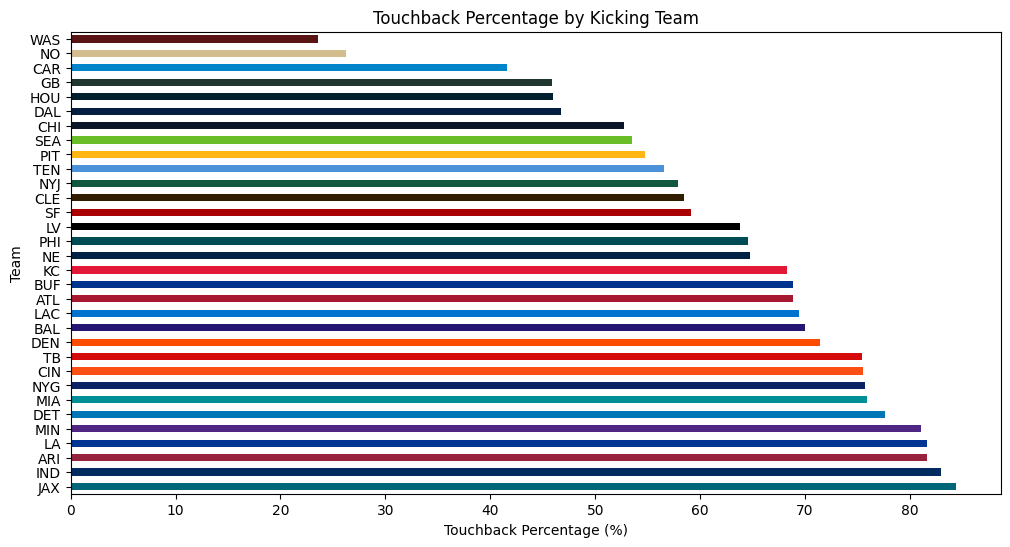

In [58]:

#for more in depth analysis, we'll plot the touchback percentage by team using a pivot table
# Create a pivot table to calculate touchback percentage by team
# Mapping of NFL team abbreviations to hex color codes (alphabetically ordered)
nfl_colors = {
    "ARI": "#97233F",
    "ATL": "#A71930",
    "BAL": "#241773",
    "BUF": "#00338D",
    "CAR": "#0085CA",
    "CHI": "#0B162A",
    "CIN": "#FB4F14",
    "CLE": "#311D00",
    "DAL": "#041E42",
    "DEN": "#FC4C02",
    "DET": "#0076B6",
    "GB": "#203731",
    "HOU": "#03202F",
    "IND": "#002C5F",
    "JAX": "#006778",
    "KC": "#E31837",
    "LAC": "#0073CF",
    "LA": "#003594",
    "LV": "#000000",
    "MIA": "#008E97",
    "MIN": "#4F2683",
    "NE": "#002244",
    "NO": "#D3BC8D",
    "NYG": "#0B2265",
    "NYJ": "#125740",
    "PHI": "#004C54",
    "PIT": "#FFB612",
    "SEA": "#69BE28",
    "SF": "#AA0000",
    "TB": "#D50A0A",
    "TEN": "#4B92DB",
    "WAS": "#5A1414"
}

kicking_team_touchback_pivot = total_kickoffs.pivot_table(
    index='DefenseTeam',
    values='TOUCHBACK',
    aggfunc=lambda x: ((x == True).sum() / len(x))* 100
).sort_values(by='TOUCHBACK', ascending=False)
# Use the color mapping for the bars
colors = [nfl_colors[team] for team in kicking_team_touchback_pivot.index]

# Convert the pivot table to a Series (assuming the column is named 'TOUCHBACK')
touchback_series = kicking_team_touchback_pivot['TOUCHBACK']

# Plot the Series so that the colors list is applied to each bar individually
touchback_series.plot.barh(
    title='Touchback Percentage by Kicking Team',
    ylabel='Team',
    xlabel='Touchback Percentage (%)',
    figsize=(12, 6),
    color=colors  # Now each bar gets its own color from the list
)


<Axes: title={'center': 'Average Starting Field Position by Return Team on Non Touchbacks'}, xlabel='Average Starting Field Position', ylabel='Team'>

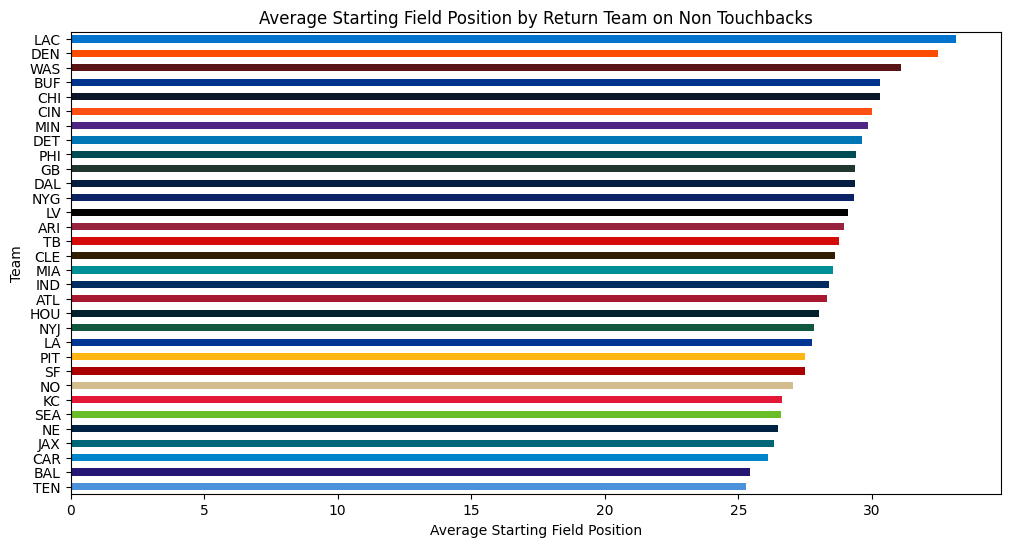

In [60]:
#now for which teams had the best returns on kickoffs
# Create a pivot table to calculate average starting field position by team on non touchback kickoffs
# Filter out touchbacks
non_touchbacks = total_kickoffs.loc[total_kickoffs["TOUCHBACK"] == False]
# Calculate average starting field position by team
return_team_pivot = non_touchbacks.pivot_table(
    index='OffenseTeam',
    values='StartingFieldPosition',
    aggfunc= 'mean'
).sort_values(by='StartingFieldPosition', ascending=True)
# Use the color mapping for the bars
colors = [nfl_colors[team] for team in return_team_pivot.index]
# Convert the pivot table to a Series (assuming the column is named 'StartingFieldPosition')
return_series = return_team_pivot['StartingFieldPosition']
# Plot the Series so that the colors list is applied to each bar individually
return_series.plot.barh(
    title='Average Starting Field Position by Return Team on Non Touchbacks',
    ylabel='Team',
    xlabel='Average Starting Field Position',
    figsize=(12, 6),
    color=colors  # Now each bar gets its own color from the list
)

<Axes: title={'center': 'Touchback Percentage by Return Team'}, xlabel='Touchback Percentage (%)', ylabel='Team'>

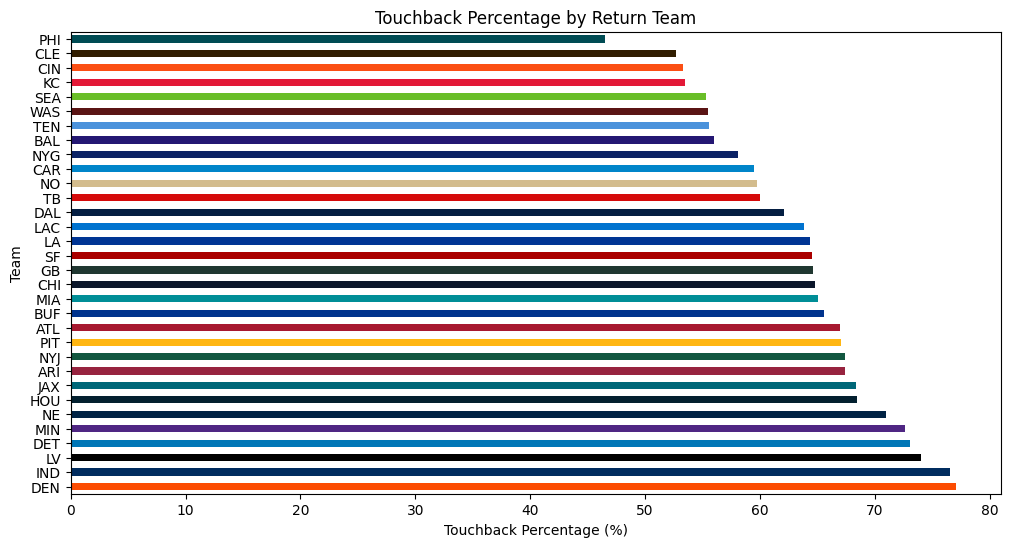

In [61]:
#compare that with touchback percentage by return team
return_team_touchback_pivot = total_kickoffs.pivot_table(
    index='OffenseTeam',
    values='TOUCHBACK',
    aggfunc=lambda x: ((x == True).sum() / len(x))* 100
).sort_values(by='TOUCHBACK', ascending=False)
# Use the color mapping for the bars
colors = [nfl_colors[team] for team in return_team_touchback_pivot.index]

# Convert the pivot table to a Series (assuming the column is named 'TOUCHBACK')
touchback_series = return_team_touchback_pivot['TOUCHBACK']

# Plot the Series so that the colors list is applied to each bar individually
touchback_series.plot.barh(
    title='Touchback Percentage by Return Team',
    ylabel='Team',
    xlabel='Touchback Percentage (%)',
    figsize=(12, 6),
    color=colors  # Now each bar gets its own color from the list
)

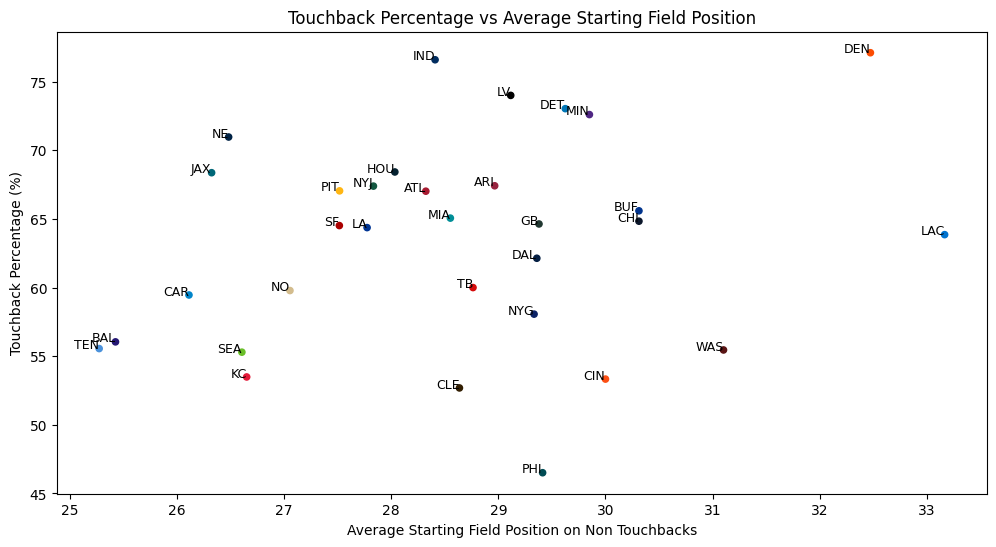

In [ ]:
#scatter plot of touchback percentage by average starting field position
#first join touchback series and return series
return_vs_touchback = pd.concat([return_series, touchback_series], axis=1)
# Rename the columns
return_vs_touchback.columns = ['Average Starting Field Position', 'Touchback Percentage']
# Plot the scatter plot
# Use the color mapping for the points
colors = [nfl_colors[team] for team in return_vs_touchback.index]

return_vs_touchback.plot.scatter(
    x='Average Starting Field Position',
    y='Touchback Percentage',
    title='Touchback Percentage vs Average Starting Field Position',
    xlabel='Average Starting Field Position on Non Touchbacks',
    ylabel='Touchback Percentage (%)',
    figsize=(12, 6),
    color=colors  # Now each bar gets its own color from the list
)